# Section 1

In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


Generate random data for x and y, it's a parabola.

In [24]:
# X-Data
N = 200
X = np.random.random(N)

In [25]:
# Generation Y-Data
sign = (- np.ones((N,)))**np.random.randint(2,size=N)
Y = np.sqrt(X) * sign

This is the network with three hidden layers, and use ReLU activation function.

In [26]:
# Neural network
act = tf.keras.layers.ReLU()
nn_sv = tf.keras.models.Sequential([
tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
tf.keras.layers.Dense(10, activation=act),
tf.keras.layers.Dense(1,activation='linear')])


In [27]:
# Loss function
loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)
# Training
results_sv = nn_sv.fit(X, Y, epochs=5, batch_size= 5, verbose=1)


Epoch 1/5


40/40 [==============================] - 1s 2ms/step - loss: 0.5045
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5013
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.4998
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.4981
Epoch 5/5
40/40 [==============================] - 0s 1ms/step - loss: 0.5006


7/7 [==============================] - 0s 1ms/step


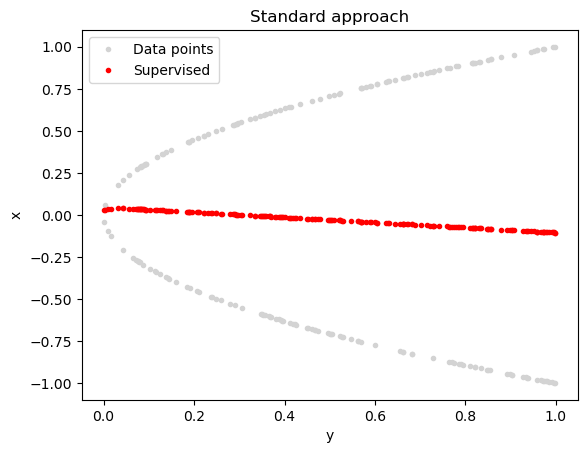

In [28]:
# Results
plt.plot(X,Y,'.',label='Data points', color="lightgray")
plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Standard approach')
plt.legend()

# A differentiable physics approach

In [29]:
# X-Data
# X = X , we can directly re-use the X from above, nothing has changed...
# Y is evaluated on the fly
# Model
nn_dp = tf.keras.models.Sequential([
tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
tf.keras.layers.Dense(10, activation=act),
tf.keras.layers.Dense(1, activation='linear')])


In [30]:
#Loss
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true,y_pred**2)
optimizer_dp = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)


In [31]:
results_dp = nn_dp.fit(X, X, epochs = 5, batch_size= 5, verbose=1)

Epoch 1/5


40/40 [==============================] - 1s 2ms/step - loss: 0.1838
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 5/5
40/40 [==============================] - 0s 1ms/step - loss: 9.3412e-04


7/7 [==============================] - 0s 1ms/step


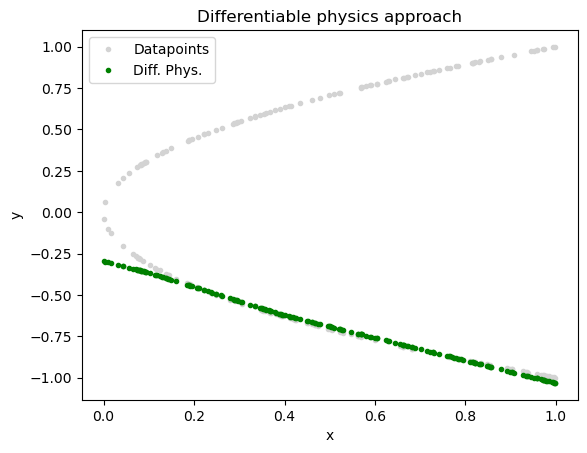

In [32]:
# Results
plt.plot(X,Y,'.',label='Datapoints', color="lightgray")
#plt.plot(X,nn_sv.predict(X),'.',label='Supervised', color="red") # optional for comparison
plt.plot(X,nn_dp.predict(X),'.',label='Diff. Phys.', color="green")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differentiable physics approach')
plt.legend()
